## Exercise 2

In this exercise, we will analyze COVID-19 hospital admissions in the UK, and you will fit an exponential curve to understand the rise in hospital admissions in a six week period from late November to early January. 

 The data is in a file called `data_2021-Feb-14.csv` (comma-separated-values format). It was downloaded from the official [website](https://coronavirus.data.gov.uk/) for UK COVID-19 data.


In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We will use `pandas`, a library for data analysis in Python to load and view the data. Pandas uses a structure called a _data frame_ to represent and manipulate data tables. All the required commands are included here, so you won't need to learn Pandas for this exercise. But if you are interested in learning more, [this](https://pandas.pydata.org/docs/) is a good place to start.

In [9]:
df_hosp = pd.read_csv('data_2021-Feb-14.csv')  # Create a data frame by loading data from a csv file
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/data_2021-Feb-14.csv'

df_hosp.head(3)   #display the first three rows

date  newAdmissions  cumulativeAdmissions
0  23/03/2020           1273                  4876
1  24/03/2020           1720                  6596
2  25/03/2020           2085                  8681

The command `pd.read_csv` loads the data onto a data frame. We have used the `.head()` command to display the top 3 rows of the data frame.

We can also display a random sample of rows from the data frame using `.sample()`, or the last few rows using `.tail()`.

In [10]:
df_hosp.tail(3)

date  newAdmissions  cumulativeAdmissions
326  12/02/2021           1493                424849
327  13/02/2021           1419                426268
328  14/02/2021           1531                427799

You can plot one column against another by just using their column names. Let us plot the newAdmissions column versus date.

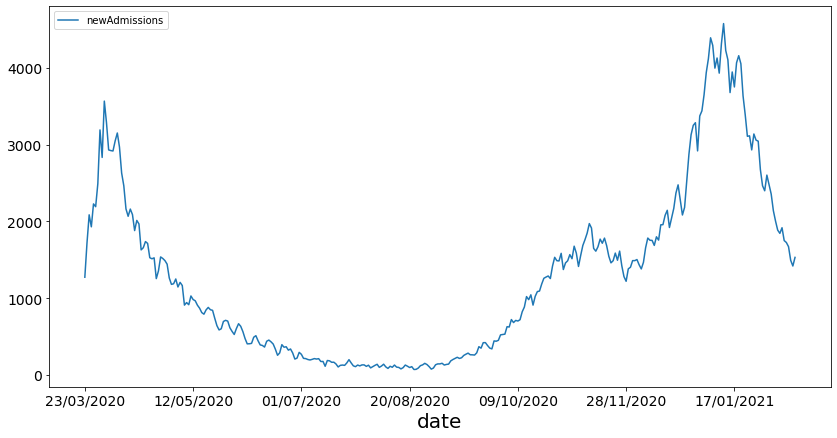

In [11]:
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

df_hosp.plot(x='date', y='newAdmissions')
plt.show()

Note the sharp increase in hospital admissions from late Novemeber to early January (the rise of the 'new variant'). We now extract the rows spanning the dates  28 November to 10 January into a data frame called `df_part`

In [12]:
df_part = df_hosp[250:294]
df_part.head(2)

date  newAdmissions  cumulativeAdmissions
250  28/11/2020           1220                220585
251  29/11/2020           1382                221967

In [13]:
df_part.tail(2)

date  newAdmissions  cumulativeAdmissions
292  09/01/2021           4126                323260
293  10/01/2021           3929                327189

We now convert the `newAdmissions` column to a numpy array `yvals`

In [15]:
yvals = np.array(df_part['newAdmissions'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) # an array containing the values 1,2....,N

## 2a) Plot the data `yvals` vs `xvals` in a scatterplot

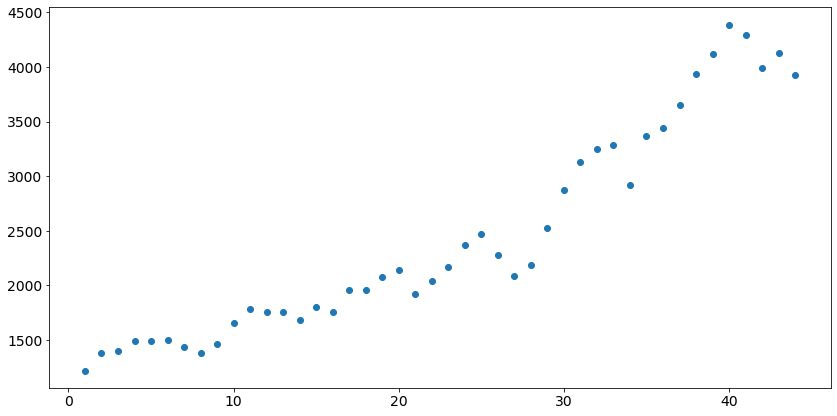

In [16]:
plt.scatter(xvals, yvals)
plt.show()

## 2b) Fit an exponential model to the data 

From our knowledge of how the virus spreads, we know that the number of infections, hospital admissions etc. should (roughly) follow an exponential curve. We would therefore like to fit a model of the form $y = c_1 e^{c_2 x}$, where $y$ is the number of admissions on day $x$. 

Note that this is a linear model on a log-scale for $y$. That is, $\log y = \log c_1 +  c_2 x$.

- Fit a linear model for $\log(\text{yvals})$ vs $\text{xvals}$, and print the values of $c_1$ and $c_2$
- Plot the fit $y = c_1 e^{c_2x}$ along with the scatterplot of the data

y=c1exp(c2x)  c1: 1193.3317781169096 c2: 0.028800216919931003


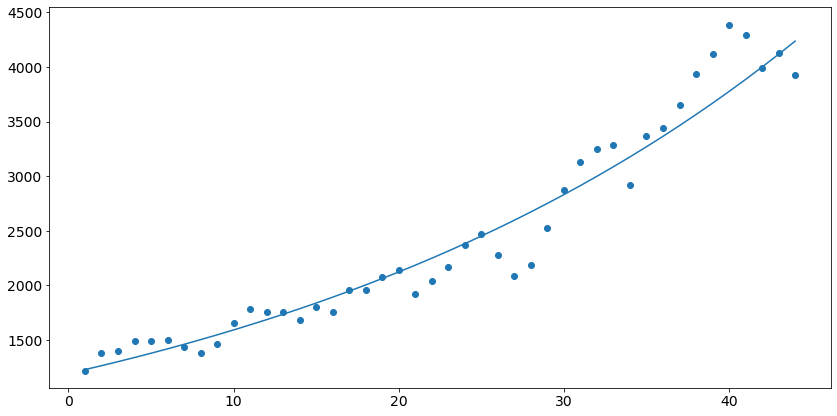

In [23]:
# I would like to recall the polyreg function I wrote earlier. Due to situations like this, I much prefer pure python to notebooks. 
#from Exercise_Notebook_1.ipynb import polyreg # Even with leading zero and spaces removed, the ipynb is still not detected as a module.
# So I had to get a new library just to hack round this: import-ipynb 
#import import_ipynb 
#import Exercise_Notebook_1.ipynb # Problem is, this runs every cell and prints a lot of graphs. 
import Polyreg # So I gave up on the notebooks and copied earlier work into a python file. 

logyvals = np.log(yvals) # take the natural log. 
# Note this approach is not attentive to weights - the smaller values are overweighted IRRC. scipy has more thorough statistical methods which deal with this. 

xlogydata = np.column_stack((xvals, logyvals)) # stack into a data matrix ready for polyreg
linearlogbeta = Polyreg.polyreg(xlogydata, 1)[0] # perform polyreg as before, saving only the beta vector
c1 = np.exp(linearlogbeta[0])
c2 = linearlogbeta[1]
print("y=c1exp(c2x)  c1:", c1, "c2:", c2)

# Reconstruct some data using this exponential model
yexp = c1*np.exp(c2*xvals)

# Plot against the data
plt.scatter(xvals, yvals)
plt.plot(xvals, yexp)
plt.show()


## 2c) Estimate the weekly growth rate in hospital admissions (in \%) over this period

_Hint_ : According to the model, admissions increase every 7 days by a factor of 
$(c_1 e^{c_2 (x+7)})/(c_1 e^{c_2 x}) = e^{7c_2}$.

In [29]:
# compute and print weekly growth rate (in %)
# Whoa units change! Above you said in /% but now in %?

# No fitting a sinusoid to the residuals?

# Is the answer given in the hint above? Just compute it?...
weeklygrowthfactor = np.exp(7*c2)
weeklypercentageincrease = 100*(weeklygrowthfactor-1)
print("Each week, the number of daily new admissions is estimated to increase by", round(weeklypercentageincrease, 1), "percent")


Each week, the number of daily new admissions is estimated to increase by 22.3 percent
